In this notebook, I have produced Bland-Altman plots for the average thickness (in the transverse direction) of the menisci.  These compare the ground truth masks of the test set with the predicted masks of the test set from different models.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Project/3D_UNet_menisc_seg/scripts/

/content/gdrive/MyDrive/Project/3D_UNet_menisc_seg/scripts


In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [4]:
# Define data path
DATA_DIR = '../data'

# Get the paths
test_paths = np.array([os.path.basename(i).split('.')[0] for i in glob.glob(f'{DATA_DIR}/test/*.im')])

In [5]:
# Function to get the thickness in the transverse direction of a mask
def average_transverse_thickness(mask):

    # Calculate the thickness for each column
    column_thickness = np.sum(mask, axis=2)

    # Count the number of columns with mask values
    num_columns_with_mask = np.count_nonzero(column_thickness)

    # Calculate total thickness of columns with mask values
    total_thickness = np.sum(column_thickness)

    # Calculate average thickness
    average_thickness = total_thickness / num_columns_with_mask

    # Convert to mm by multiplying by voxel height
    voxel_height = 0.7
    av_thickness_mm = average_thickness * voxel_height

    return av_thickness_mm

In [6]:
# function to return array of av thicknesses of a set of masks
def get_av_thickness_arr(sub_dir):
    thickness_arr = []

    for path in test_paths:
        # Read in mask file
        seg_path = os.path.join(DATA_DIR, sub_dir, path + '.npy')
        mask = np.load(seg_path)

        # extract only the menisci from ground-truth
        if sub_dir == 'ground-truth':
            #medial meniscus
            mask = mask[...,-1]

        thickness_arr.append(average_transverse_thickness(mask))

    return thickness_arr

In [27]:
# Get the av thickness of the ground truths
gt_thickness_arr = get_av_thickness_arr('ground-truth')

In [28]:
gt_thickness_arr = np.array(gt_thickness_arr)

In [29]:
gt_thickness_arr.mean()

10.19697564661927

In [30]:
# Get the av thickness of all models (U-Net and both SAM configurations)
#unet_thickness_arr = get_av_thickness_arr('ground-truth')
sam_frozen_thickness_arr = get_av_thickness_arr('frozen_enc_test_preds')
sam_end2end_thickness_arr = get_av_thickness_arr('end2end_test_preds')

In [31]:
sam_frozen_thickness_arr = np.array(sam_frozen_thickness_arr)
sam_end2end_thickness_arr = np.array(sam_end2end_thickness_arr)

In [32]:
sam_frozen_thickness_arr.mean()

8.19014914650217

In [33]:
sam_end2end_thickness_arr.mean()

9.770772562794274

In [34]:
unet_thickness_arr = get_av_thickness_arr('unet_test_preds')
unet_thickness_arr = np.array(unet_thickness_arr)

In [35]:
unet_thickness_arr.mean()

10.676226889640883

In [36]:
# get mean and stdev of difference
froz_diff = gt_thickness_arr - sam_frozen_thickness_arr
e2e_diff = gt_thickness_arr - sam_end2end_thickness_arr
unet_diff = gt_thickness_arr - unet_thickness_arr

In [37]:
import pandas as pd

# Make dataframe of these?
diff_dict = {
    "SAM 1": froz_diff,
    "SAM 2": e2e_diff,
    "U-Net": unet_diff
}
diff_df = pd.DataFrame(diff_dict)

In [39]:
diff_df.describe()

,SAM 1,SAM 2,U-Net
count,28.000000,28.000000,28.000000
mean,2.006827,0.426203,-0.479251
std,0.952480,0.699060,0.563402
min,0.106333,-1.117074,-1.551257
25%,1.641532,-0.063464,-0.849758
50%,1.998469,0.288998,-0.463549
75%,2.572544,0.910111,-0.138090
max,4.833475,1.920246,0.858288


## Plots below

In [ ]:
# time to plot

In [ ]:
# U-Net
f, ax = plt.subplots(1)
sm.graphics.mean_diff_plot(gt_thickness_arr, unet_thickness_arr, ax = ax)
plt.xlabel("Mean (mm)")
plt.ylabel("Difference (mm)")
plt.savefig("BA_plot_unet", bbox_inches="tight", dpi=500)
plt.show()

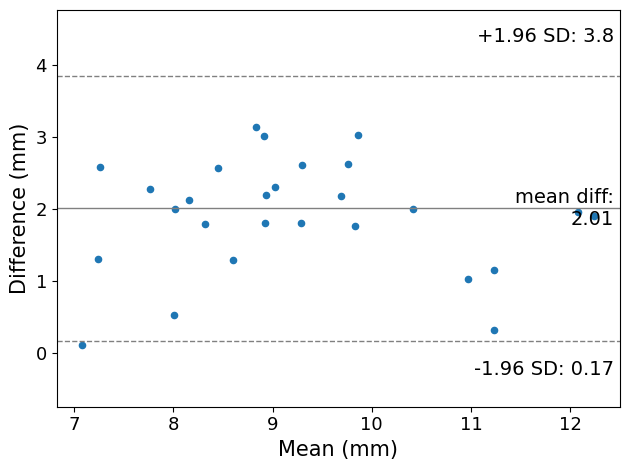

In [ ]:
# SAM frozen encoder
f, ax = plt.subplots(1)
sm.graphics.mean_diff_plot(gt_thickness_arr, sam_frozen_thickness_arr, ax = ax)
plt.xlabel("Mean (mm)")
plt.ylabel("Difference (mm)")
plt.savefig("BA_plot_sam_froz", bbox_inches="tight", dpi=500)
plt.show()

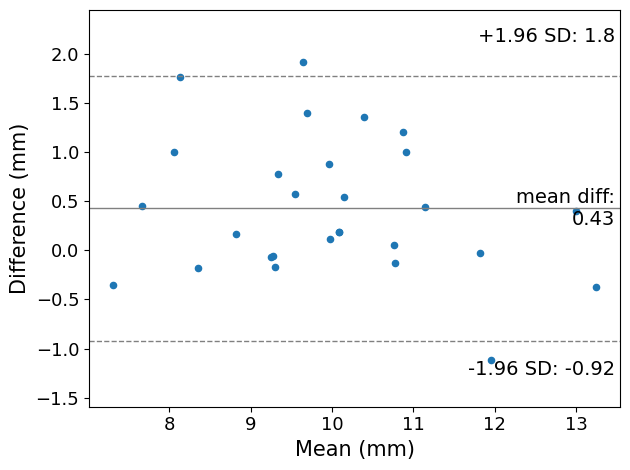

In [ ]:
# SAM end-2-end
f, ax = plt.subplots(1)
sm.graphics.mean_diff_plot(gt_thickness_arr, sam_end2end_thickness_arr, ax = ax)
plt.xlabel("Mean (mm)")
plt.ylabel("Difference (mm)")
plt.savefig("BA_plot_sam_e2e", bbox_inches="tight", dpi=500)
plt.show()

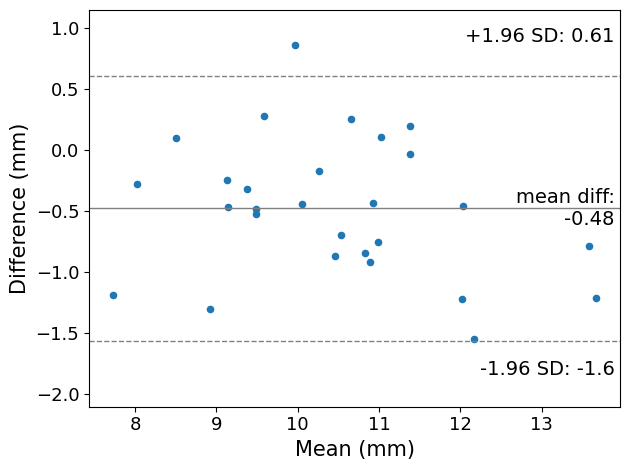

In [18]:
# UNet
f, ax = plt.subplots(1)
sm.graphics.mean_diff_plot(gt_thickness_arr, unet_thickness_arr, ax = ax)
plt.xlabel("Mean (mm)")
plt.ylabel("Difference (mm)")
plt.savefig("BA_plot_unet", bbox_inches="tight", dpi=500)
plt.show()